In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
korean_1 = pd.read_csv("C:\\Users\\dayfl\\Exercise\\korean.csv", index_col = 0)

In [9]:
korean_1

,base_date,time,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01,1,건입동,남성,1,179561.0222,2332.3166,84054.9450
1,2018-01,1,건입동,남성,2,187724.7308,16573.3673,144743.5840
2,2018-01,1,건입동,남성,3,300209.1704,22547.4924,176848.8478
3,2018-01,1,건입동,남성,4,197044.3400,8959.4728,61090.9183
4,2018-01,1,건입동,여성,1,173498.2215,1214.2010,75954.2074
...,...,...,...,...,...,...,...,...
57787,2021-06,4,효돈동,남성,4,126990.9502,2313.9081,35946.0267
57788,2021-06,4,효돈동,여성,1,61672.4237,1194.8385,24876.8322
57789,2021-06,4,효돈동,여성,2,59736.0717,1985.2698,36187.0549
57790,2021-06,4,효돈동,여성,3,111268.2335,4507.5970,45027.4469


In [100]:
korean_2 = pd.get_dummies(korean_1, columns=['sex'])

In [102]:
korean_3 = korean_2.drop(['sex_여성'], axis = 1)

In [103]:
korean_3

,base_date,time,emd_nm,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성
0,2018-01,1,건입동,1,179561.0222,2332.3166,84054.9450,1
1,2018-01,1,건입동,2,187724.7308,16573.3673,144743.5840,1
2,2018-01,1,건입동,3,300209.1704,22547.4924,176848.8478,1
3,2018-01,1,건입동,4,197044.3400,8959.4728,61090.9183,1
4,2018-01,1,건입동,1,173498.2215,1214.2010,75954.2074,0
...,...,...,...,...,...,...,...,...
57787,2021-06,4,효돈동,4,126990.9502,2313.9081,35946.0267,1
57788,2021-06,4,효돈동,1,61672.4237,1194.8385,24876.8322,0
57789,2021-06,4,효돈동,2,59736.0717,1985.2698,36187.0549,0
57790,2021-06,4,효돈동,3,111268.2335,4507.5970,45027.4469,0


In [120]:
korean_3.corr()

,time,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성
time,1.000000e+00,-3.708243e-16,-0.100958,0.100895,0.177585,-3.291832e-17
age,-3.708243e-16,1.000000e+00,0.007258,-0.043004,0.019590,1.200373e-17
resd_pop_cnt,-1.009576e-01,7.257641e-03,1.000000,0.584682,0.668862,-1.891192e-02
work_pop_cnt,1.008949e-01,-4.300383e-02,0.584682,1.000000,0.800956,4.028203e-02
visit_pop_cnt,1.775846e-01,1.959046e-02,0.668862,0.800956,1.000000,5.625763e-02
sex_남성,-3.291832e-17,1.200373e-17,-0.018912,0.040282,0.056258,1.000000e+00


<AxesSubplot:ylabel='Frequency'>

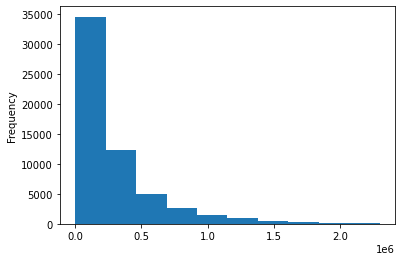

In [105]:
korean_3['resd_pop_cnt'].plot.hist()

In [106]:
quantile_25_resd = np.quantile(korean_3['resd_pop_cnt'], 0.25)
quantile_75_resd = np.quantile(korean_3['resd_pop_cnt'], 0.75)
IQR_resd = quantile_75_resd - quantile_25_resd
lower_resd = quantile_25_resd - 1.5 * IQR_resd
upper_resd = quantile_75_resd + 1.5 * IQR_resd

In [107]:
korean_4 = korean_3[(korean_3['resd_pop_cnt'] > lower_resd) & (korean_3['resd_pop_cnt'] < upper_resd)]

In [108]:
korean_4

,base_date,time,emd_nm,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성
0,2018-01,1,건입동,1,179561.0222,2332.3166,84054.9450,1
1,2018-01,1,건입동,2,187724.7308,16573.3673,144743.5840,1
2,2018-01,1,건입동,3,300209.1704,22547.4924,176848.8478,1
3,2018-01,1,건입동,4,197044.3400,8959.4728,61090.9183,1
4,2018-01,1,건입동,1,173498.2215,1214.2010,75954.2074,0
...,...,...,...,...,...,...,...,...
57787,2021-06,4,효돈동,4,126990.9502,2313.9081,35946.0267,1
57788,2021-06,4,효돈동,1,61672.4237,1194.8385,24876.8322,0
57789,2021-06,4,효돈동,2,59736.0717,1985.2698,36187.0549,0
57790,2021-06,4,효돈동,3,111268.2335,4507.5970,45027.4469,0


<AxesSubplot:ylabel='Frequency'>

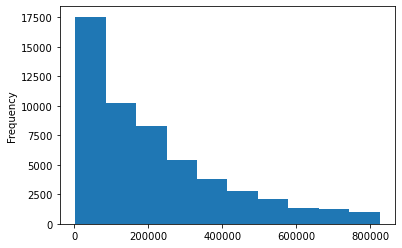

In [109]:
korean_4['resd_pop_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

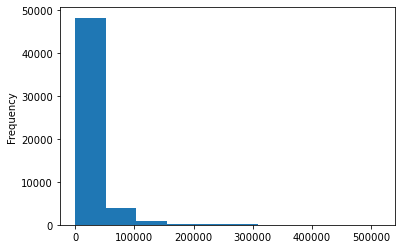

In [110]:
korean_4['work_pop_cnt'].plot.hist()

In [111]:
quantile_25_work = np.quantile(korean_4['work_pop_cnt'], 0.25)
quantile_75_work = np.quantile(korean_4['work_pop_cnt'], 0.75)
IQR_work = quantile_75_work - quantile_25_work
lower_work = quantile_25_work - 1.5 * IQR_work
upper_work = quantile_75_work + 1.5 * IQR_work

In [112]:
korean_5 = korean_4[(korean_4['work_pop_cnt'] > lower_work) & (korean_4['work_pop_cnt'] < upper_work)]

In [114]:
korean_5

,base_date,time,emd_nm,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성
0,2018-01,1,건입동,1,179561.0222,2332.3166,84054.9450,1
1,2018-01,1,건입동,2,187724.7308,16573.3673,144743.5840,1
2,2018-01,1,건입동,3,300209.1704,22547.4924,176848.8478,1
3,2018-01,1,건입동,4,197044.3400,8959.4728,61090.9183,1
4,2018-01,1,건입동,1,173498.2215,1214.2010,75954.2074,0
...,...,...,...,...,...,...,...,...
57787,2021-06,4,효돈동,4,126990.9502,2313.9081,35946.0267,1
57788,2021-06,4,효돈동,1,61672.4237,1194.8385,24876.8322,0
57789,2021-06,4,효돈동,2,59736.0717,1985.2698,36187.0549,0
57790,2021-06,4,효돈동,3,111268.2335,4507.5970,45027.4469,0


<AxesSubplot:ylabel='Frequency'>

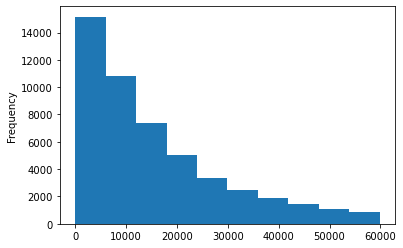

In [115]:
korean_5['work_pop_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

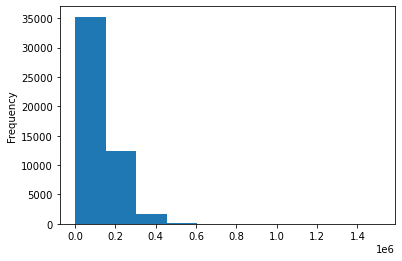

In [116]:
korean_5['visit_pop_cnt'].plot.hist()

In [117]:
quantile_25_visit = np.quantile(korean_5['visit_pop_cnt'], 0.25)
quantile_75_visit = np.quantile(korean_5['visit_pop_cnt'], 0.75)
IQR_visit = quantile_75_visit - quantile_25_visit
lower_visit = quantile_25_visit - 1.5 * IQR_visit
upper_visit = quantile_75_visit + 1.5 * IQR_visit

In [118]:
korean_6 = korean_5[(korean_5['visit_pop_cnt'] > lower_visit) & (korean_5['visit_pop_cnt'] < upper_visit)]

In [121]:
korean_6

,base_date,time,emd_nm,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성
0,2018-01,1,건입동,1,179561.0222,2332.3166,84054.9450,1
1,2018-01,1,건입동,2,187724.7308,16573.3673,144743.5840,1
2,2018-01,1,건입동,3,300209.1704,22547.4924,176848.8478,1
3,2018-01,1,건입동,4,197044.3400,8959.4728,61090.9183,1
4,2018-01,1,건입동,1,173498.2215,1214.2010,75954.2074,0
...,...,...,...,...,...,...,...,...
57787,2021-06,4,효돈동,4,126990.9502,2313.9081,35946.0267,1
57788,2021-06,4,효돈동,1,61672.4237,1194.8385,24876.8322,0
57789,2021-06,4,효돈동,2,59736.0717,1985.2698,36187.0549,0
57790,2021-06,4,효돈동,3,111268.2335,4507.5970,45027.4469,0


<AxesSubplot:ylabel='Frequency'>

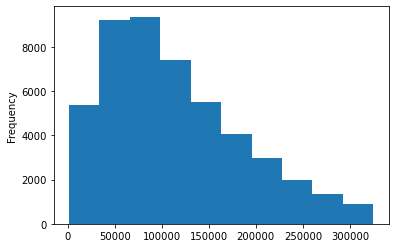

In [119]:
korean_6['visit_pop_cnt'].plot.hist()

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [124]:
korean_7 = korean_6.copy()

In [126]:
korean_7['resd_pop_cnt'] = scaler.fit_transform(korean_6[['resd_pop_cnt']])
korean_7['work_pop_cnt'] = scaler.fit_transform(korean_6[['work_pop_cnt']])
korean_7['visit_pop_cnt'] = scaler.fit_transform(korean_6[['visit_pop_cnt']])

In [127]:
korean_7

,base_date,time,emd_nm,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성
0,2018-01,1,건입동,1,-0.059155,-0.942396,-0.408849,1
1,2018-01,1,건입동,2,-0.011747,0.139380,0.432832,1
2,2018-01,1,건입동,3,0.641469,0.593186,0.878095,1
3,2018-01,1,건입동,4,0.042373,-0.438985,-0.727334,1
4,2018-01,1,건입동,1,-0.094363,-1.027330,-0.521197,0
...,...,...,...,...,...,...,...,...
57787,2021-06,4,효돈동,4,-0.364439,-0.943795,-1.076064,1
57788,2021-06,4,효돈동,1,-0.743755,-1.028801,-1.229581,0
57789,2021-06,4,효돈동,2,-0.755000,-0.968759,-1.072721,0
57790,2021-06,4,효돈동,3,-0.455743,-0.777158,-0.950115,0


In [128]:
food_waste_month = pd.read_csv("C:\\Users\\dayfl\\Desktop\\food_waste_month.csv", encoding = "cp949")

In [129]:
food_waste_month

,base_date,emd_nm,sum(em_cnt),sum(em_g),sum(pay_amt)
0,2018-01,건입동,18416,45646550,1364804
1,2018-01,남원읍,9570,42437700,1270773
2,2018-01,노형동,113990,265018400,7883340
3,2018-01,대륜동,21666,57612600,1676850
4,2018-01,대정읍,10185,38885550,1164122
...,...,...,...,...,...
1661,2021-06,표선면,10751,42453750,1271419
1662,2021-06,한경면,8031,27060150,809898
1663,2021-06,한림읍,25653,82746990,2476292
1664,2021-06,화북동,66088,110750050,3306029


<AxesSubplot:ylabel='Frequency'>

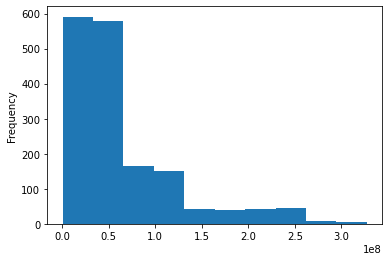

In [130]:
food_waste_month['sum(em_g)'].plot.hist()

In [131]:
food_waste_month['sum(em_g)'] = np.log(food_waste_month[['sum(em_g)']])

<AxesSubplot:ylabel='Frequency'>

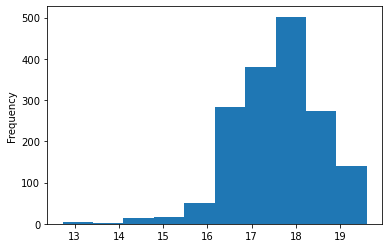

In [132]:
food_waste_month['sum(em_g)'].plot.hist()

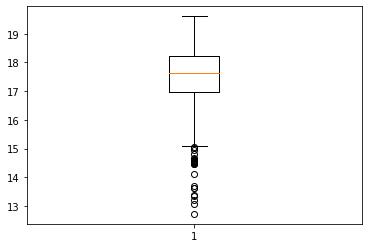

In [133]:
box_food_waste_month = plt.boxplot(food_waste_month[['sum(em_g)']].values)
plt.show()

In [134]:
food_waste_month['sum(em_g)'] = scaler.fit_transform(food_waste_month[['sum(em_g)']])

In [135]:
food_waste_month

,base_date,emd_nm,sum(em_cnt),sum(em_g),sum(pay_amt)
0,2018-01,건입동,18416,0.064537,1364804
1,2018-01,남원읍,9570,-0.011915,1270773
2,2018-01,노형동,113990,1.909326,7883340
3,2018-01,대륜동,21666,0.308722,1676850
4,2018-01,대정읍,10185,-0.103599,1164122
...,...,...,...,...,...
1661,2021-06,표선면,10751,-0.011518,1271419
1662,2021-06,한경면,8031,-0.483871,809898
1663,2021-06,한림읍,25653,0.688454,2476292
1664,2021-06,화북동,66088,0.994181,3306029


In [137]:
korean_merge = food_waste_month.merge(korean_7, left_on=['base_date', 'emd_nm'], right_on=['base_date', 'emd_nm'])

In [138]:
korean_merge

,base_date,emd_nm,sum(em_cnt),sum(em_g),sum(pay_amt),time,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성
0,2018-01,건입동,18416,0.064537,1364804,1,1,-0.059155,-0.942396,-0.408849,1
1,2018-01,건입동,18416,0.064537,1364804,1,2,-0.011747,0.139380,0.432832,1
2,2018-01,건입동,18416,0.064537,1364804,1,3,0.641469,0.593186,0.878095,1
3,2018-01,건입동,18416,0.064537,1364804,1,4,0.042373,-0.438985,-0.727334,1
4,2018-01,건입동,18416,0.064537,1364804,1,1,-0.094363,-1.027330,-0.521197,0
...,...,...,...,...,...,...,...,...,...,...,...
43156,2021-06,효돈동,8720,-0.464898,824457,4,4,-0.364439,-0.943795,-1.076064,1
43157,2021-06,효돈동,8720,-0.464898,824457,4,1,-0.743755,-1.028801,-1.229581,0
43158,2021-06,효돈동,8720,-0.464898,824457,4,2,-0.755000,-0.968759,-1.072721,0
43159,2021-06,효돈동,8720,-0.464898,824457,4,3,-0.455743,-0.777158,-0.950115,0


In [139]:
korean_merge_1 = korean_merge.drop(['sum(em_cnt)', 'sum(pay_amt)'], axis = 1)

In [140]:
korean_merge_1

,base_date,emd_nm,sum(em_g),time,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성
0,2018-01,건입동,0.064537,1,1,-0.059155,-0.942396,-0.408849,1
1,2018-01,건입동,0.064537,1,2,-0.011747,0.139380,0.432832,1
2,2018-01,건입동,0.064537,1,3,0.641469,0.593186,0.878095,1
3,2018-01,건입동,0.064537,1,4,0.042373,-0.438985,-0.727334,1
4,2018-01,건입동,0.064537,1,1,-0.094363,-1.027330,-0.521197,0
...,...,...,...,...,...,...,...,...,...
43156,2021-06,효돈동,-0.464898,4,4,-0.364439,-0.943795,-1.076064,1
43157,2021-06,효돈동,-0.464898,4,1,-0.743755,-1.028801,-1.229581,0
43158,2021-06,효돈동,-0.464898,4,2,-0.755000,-0.968759,-1.072721,0
43159,2021-06,효돈동,-0.464898,4,3,-0.455743,-0.777158,-0.950115,0


In [141]:
korean_merge_1.corr()

,sum(em_g),time,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,sex_남성
sum(em_g),1.000000,-0.005516,0.043727,0.588827,0.347277,0.360436,-0.000156
time,-0.005516,1.000000,-0.002359,-0.150304,0.143821,0.247298,-0.005119
age,0.043727,-0.002359,1.000000,0.094309,0.063160,0.099255,-0.001086
resd_pop_cnt,0.588827,-0.150304,0.094309,1.000000,0.455996,0.462401,-0.020724
work_pop_cnt,0.347277,0.143821,0.063160,0.455996,1.000000,0.768642,0.063928
visit_pop_cnt,0.360436,0.247298,0.099255,0.462401,0.768642,1.000000,0.048803
sex_남성,-0.000156,-0.005119,-0.001086,-0.020724,0.063928,0.048803,1.000000
